In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('/content/drive/MyDrive/courses/machine learning with python/odev/turkiye_energy.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              52 non-null     int64 
 1   total             52 non-null     object
 2   coal              52 non-null     object
 3   Liquid_fuels      52 non-null     object
 4   natural_gas       52 non-null     object
 5   hydro             52 non-null     object
 6   renewable_wastes  52 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


In [5]:
data.head()

,year,total,coal,Liquid_fuels,natural_gas,hydro,renewable_wastes
0,1970,8 623,"32,7","30,2",-,"35,2","1,9"
1,1971,9 781,"30,4","41,2",-,"26,7","1,7"
2,1972,11 242,"26,0","43,9",-,"28,5","1,6"
3,1973,12 425,"26,1","51,3",-,"21,0","1,6"
4,1974,13 477,"28,8","44,8",-,"24,9","1,5"


In [6]:
data = data.replace({ " " : "", "," : "." , "-" : np.NaN}, regex = True)

In [7]:
data[['total', 'coal', 'Liquid_fuels', 'natural_gas', 'hydro', 'renewable_wastes']] = data[['total', 'coal', 'Liquid_fuels', 'natural_gas', 'hydro', 'renewable_wastes']].apply(pd.to_numeric)

In [8]:
data.describe()

,year,total,coal,Liquid_fuels,natural_gas,hydro,renewable_wastes
count,52.000000,52.000000,52.000000,52.000000,37.000000,52.000000,52.000000
mean,1995.500000,119257.653846,30.615385,13.036538,30.210811,32.426923,2.430769
std,15.154757,100283.837489,5.379860,13.891809,14.759249,10.816438,4.466632
min,1970.000000,8623.000000,22.800000,0.100000,0.200000,16.100000,0.000000
25%,1982.750000,27148.250000,26.250000,2.475000,18.300000,24.500000,0.200000
50%,1995.500000,90554.500000,30.300000,6.950000,32.500000,29.850000,0.400000
75%,2008.250000,195714.250000,32.850000,23.150000,43.800000,41.275000,1.750000
max,2021.000000,334723.000000,49.000000,51.300000,49.700000,60.300000,19.100000


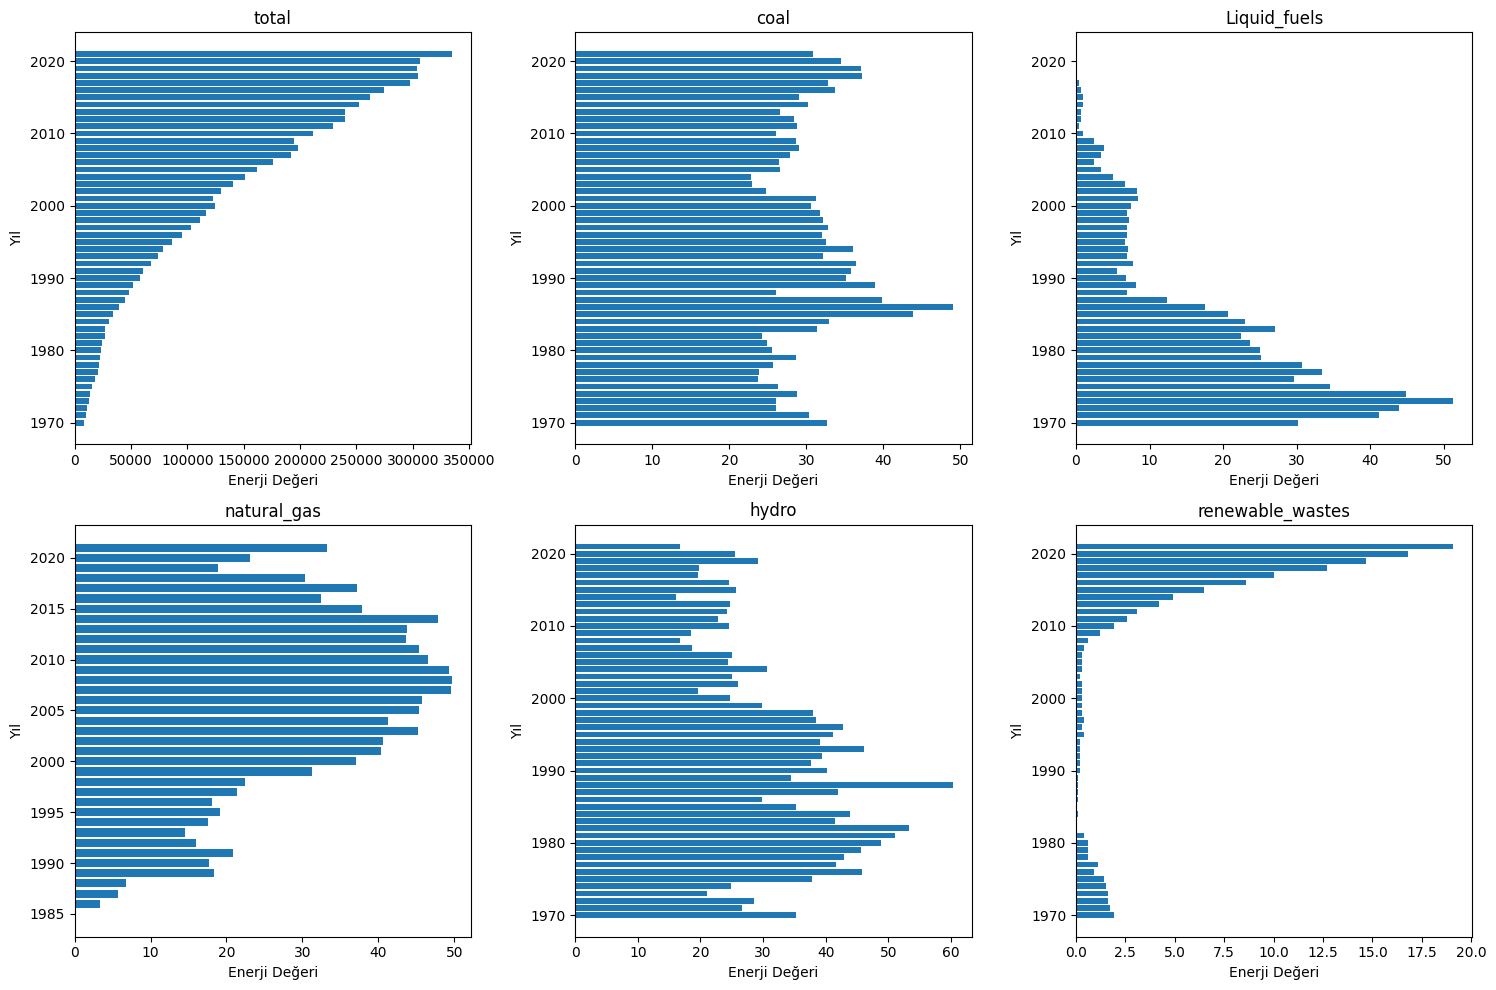

In [9]:
energy_columns = ['total', 'coal', 'Liquid_fuels', 'natural_gas', 'hydro', 'renewable_wastes']

n_rows = 2
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for i, col in enumerate(energy_columns):
    row = i // n_cols
    col_num = i % n_cols
    axes[row, col_num].barh(data['year'], data[col])
    axes[row, col_num].set_title(col)
    axes[row, col_num].set_xlabel('Enerji Değeri')
    axes[row, col_num].set_ylabel('Yıl')

plt.tight_layout()
plt.show()


In [10]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [11]:
data['natural_gas'] = imputer.fit_transform(data[['natural_gas']])

In [12]:
x = data[['year', 'total']]
y = data[energy_columns].astype(float)

In [13]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(scaler.transform(np.array([[2040, 0]])))
y_pred[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


6.184563972055912e-11

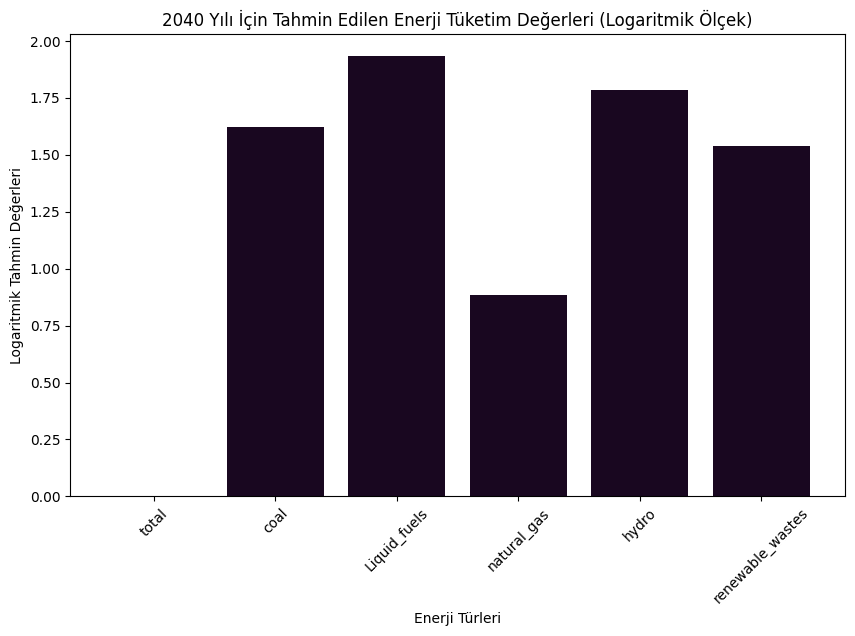

In [47]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_log = np.log10(np.abs(y_pred[0]) + 1)  # logaritmayı alırken sıfır veya negatif değerlerle sorun yaşamamak için +1

plt.figure(figsize=(10, 6))
plt.bar(energy_columns, y_pred_log, color='#190720', )

plt.title('2040 Yılı İçin Tahmin Edilen Enerji Tüketim Değerleri (Logaritmik Ölçek)')
plt.xlabel('Enerji Türleri')
plt.ylabel('Logaritmik Tahmin Değerleri')
plt.xticks(rotation=45)

plt.show()
